In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Implementasi Filter Kalman untuk Estimasi Posisi Robot

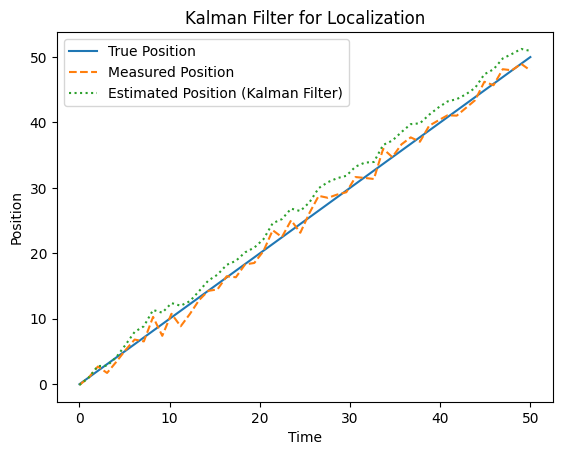

In [12]:
# Definisikan variabel untuk filter Kalman
A = np.array([[1, 1], [0, 1]])  # Matrix sistem
B = np.array([[0.5], [1]])      # Input kontrol (kecepatan)
H = np.array([[1, 0]])          # Matriks pengukuran

# Nilai awal
x = np.array([[0], [0]])  # posisi awal
P = np.array([[1000, 0], [0, 1000]])  # Kovarians awal
Q = np.array([[1, 0], [0, 1]])  # Noise sistem
R = np.array([[10]])    # Noise pengukuran

# Ukuran waktu simulasi
T = 50
time = np.linspace(0, T, T) # Membuat garis waktu
true_position = time  # Posisi sebenarnya (gerakan linear)
measurements = true_position + np.random.normal(0, 1, size=T)  # Simulasi pengukuran (penambahan noise)

# Simulasi Kalman Filtering
estimated_position = []
for z in measurements:
    # Prediksi
    x = np.dot(A, x) + np.dot(B, 1)  # Prediksi posisi robot
    P = np.dot(np.dot(A, P), A.T) + Q # Prediksi kovarians

    # Koreksi (Update)
    K = np.dot(np.dot(P, H.T), np.linalg.inv(np.dot(np.dot(H, P), H.T) + R)) # Menghitung gain
    x = x + np.dot(K, z - np.dot(H, x)) # Menambahkan koreksi pada posisi
    P = np.dot(np.eye(2) - np.dot(K, H), P) # Menambahkan koreksi pada kovarians

    estimated_position.append(x[0, 0])

# Plot hasil estimasi dan pengukuran menggunakan matplotlib
plt.plot(time, true_position, label="True Position")
plt.plot(time, measurements, label="Measured Position", linestyle="dashed")
plt.plot(time, estimated_position, label="Estimated Position (Kalman Filter)", linestyle="dotted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Kalman Filter for Localization")
plt.show()

Hasil Analisis Output: 

Dapat dilihat bahwa Kalman Filter mampu memperbaiki perkiraan posisi robot dengan membuat estimasi dari hasil pengukuran menjadi lebih stabil, dengan garis yang tampak lebih mulus dibandingkan dengan hasil pengukuran. Terlihat juga bahwa noise pengukuran dapat diredam oleh Filter, dengan garis estimasi yang tidak sering bersilangan dengan garis posisi sebenarnya dibandingkan dengan garis pengukuran yang penuh dengan noise.

# Implementasi Filter Partikel untuk Estimasi Posisi Robot

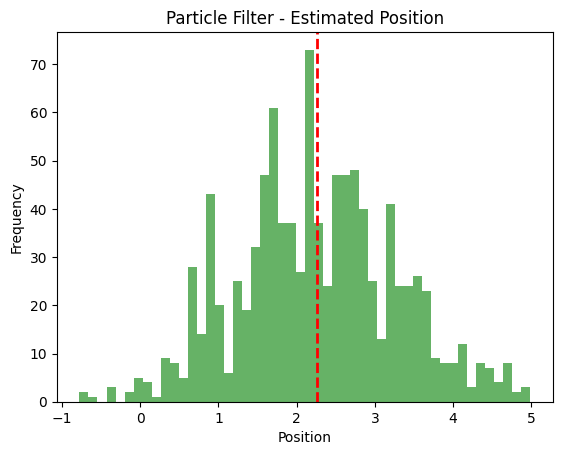

In [42]:
# Jumlah partikel
N = 1000

# Inisialisasi posisi partikel secara acak
particles = np.random.uniform(low=-5, high=5, size=N)

# Pengukuran yang diterima
measurements = 2 + np.random.normal(0, 0.5, size=N)

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal (sama rata)
resampled_particles = []

for measurement in measurements:
    # Update bobot partikel
    weights = np.exp(-0.5 * (particles - measurement)**2)  # Pembaruan bobot berdasarkan pengukuran
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling (Mengambil partikel dengan bobot lebih besar)
    indexes = np.random.choice(range(N), size=N, p=weights) # Memilih indeks sampel acak berdasarkan bobot
    resampled_particles = particles[indexes] # Menyematkan indeks acak ke dalam ruang partikel

# Estimasi posisi akhir
estimated_position = np.mean(resampled_particles)

# Plot hasil menggunakan matplotlib
plt.hist(resampled_particles, bins=50, alpha=0.6, color='g')
plt.axvline(x=estimated_position, color='r', linestyle='dashed', linewidth=2)
plt.title("Particle Filter - Estimated Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

Hasil Analisis Output: 

Output dari kode ini akan menunjukkan distribusi partikel yang telah diresampling dan posisi akhir yang diestimasi sebagai garis vertikal merah pada histogram. Posisi akhir yang diestimasi mendekati nilai rata-rata dari pengukuran yang diterima (yaitu 2 ditambah dengan noise pengukuran). Secara keseluruhan, kode ini menerapkan algoritma Particle Filter dengan cukup baik untuk memperkirakan posisi berdasarkan pengukuran yang dipenuhi noise.

# Implementasi Lokalisasi dengan Sensor IMU dan Lidar

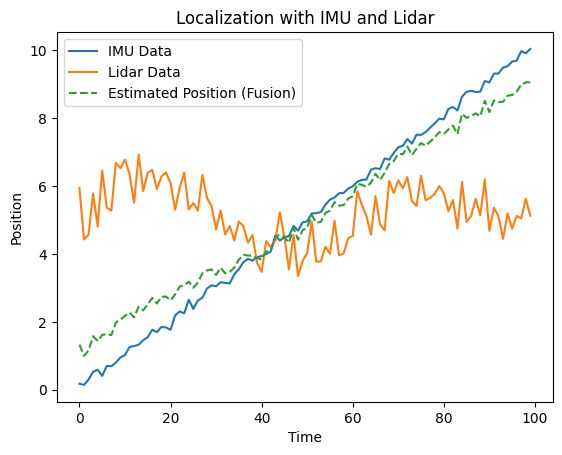

In [18]:
np.random.seed(0) 
time = np.linspace(0, 10, 100) # Waktu dari 0 hingga 10 detik
true_imu_data = time # IMU disimulasikan mengambail data kecepatan konstan
imu_noise = np.random.normal(0, 0.1, size=time.shape) # Noise normal dengan standar deviasi 0.1 
imu_data = true_imu_data + imu_noise # Data IMU yang sebenarnya dengan noise

# Simulasi data Lidar dengan noise 
lidar_true_distance = 5 + np.sin(time) # Jarak sebenarnya dengan variasi sinusoidal
lidar_noise = np.random.normal(0, 0.5, size=time.shape) # Noise normal dengan standar deviasi 0.5
lidar_data = lidar_true_distance + lidar_noise # Data Lidar dengan noise

# Sensor Fusion (kombinasi IMU dan Lidar)
# Metode: Weighted average
alpha = 0.8  # Bobot untuk IMU
beta = 0.2   # Bobot untuk Lidar

estimated_position = alpha * imu_data + beta * lidar_data

# Plot hasil
plt.plot(imu_data, label="IMU Data")
plt.plot(lidar_data, label="Lidar Data")
plt.plot(estimated_position, label="Estimated Position (Fusion)", linestyle='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Localization with IMU and Lidar")
plt.show()

Hasil Analisis Output:

Sensor fusion digunakan dalam menghasilkan estimasi posisi yang lebih akurat dengan menggabungkan kedua data tersebut, dengan bobot yang ditentukan secara manual (contoh, IMU diberikan bobot lebih besar dalam menentukan estimasi posisi robot).

Dengan menggunakan sensor fusion, posisi yang diestimasi menjadi lebih akurat dibandingkan jika hanya menggunakan salah satu sensor saja. Hal ini karena sensor fusion menggabungkan kekuatan dari kedua sensor, mengurangi efek noise, dan meningkatkan keandalan estimasi posisi.

# Implementasi Simulasi Extended Kalman Filter untuk Navigasi

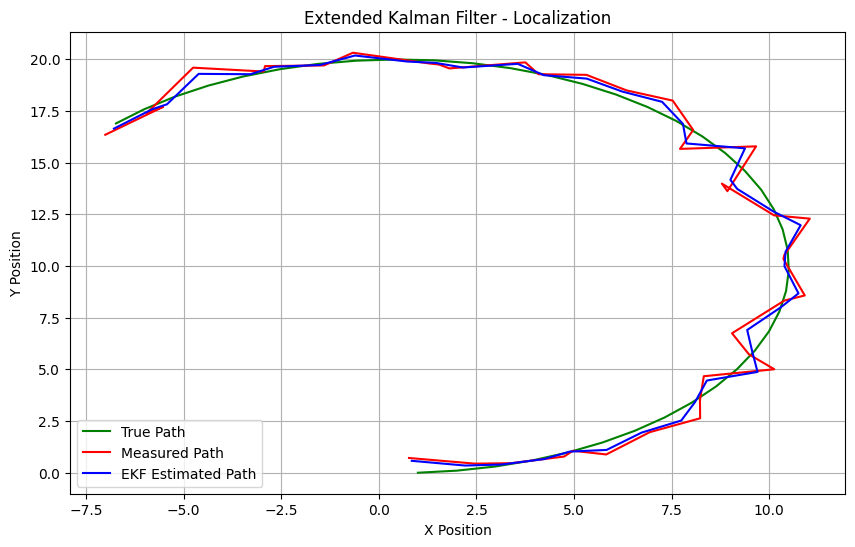

In [37]:
# Definisikan model sistem robot (non-linear)
def robot_model(x, u):
    dx = u[0] * np.cos(x[2])
    dy = u[0] * np.sin(x[2])
    dtheta = u[1]
    return np.array([x[0] + dx, x[1] + dy, x[2] + dtheta])

# Kalman Filter - Update ekstensif
def ekf_predict(x, P, u, Q):
    x_pred = robot_model(x, u)
    F = np.array([[1, 0, -u[0] * np.sin(x[2])],
                  [0, 1, u[0] * np.cos(x[2])],
                  [0, 0, 1]])
    P_pred = np.dot(np.dot(F, P), F.T) + Q
    return x_pred, P_pred

def ekf_update(x_pred, P_pred, z, R):
    H = np.array([[1, 0, 0], [0, 1, 0]])
    K = np.dot(np.dot(P_pred, H.T), np.linalg.inv(np.dot(np.dot(H, P_pred), H.T) + R))
    x = x_pred + np.dot(K, (z - np.dot(H, x_pred)))
    P = np.dot(np.eye(3) - np.dot(K, H), P_pred)
    return x, P

# Parameter simulasi
u = np.array([1, 0.1])
x = np.array([0, 0, 0])
P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Q = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
R = np.array([[0.5, 0], [0, 0.5]])

# Simulasi filter EKF
num_steps = 40
true_path = []
measured_path = []
estimated_path = []

for _ in range(num_steps):
    # Prediksi posisi robot
    x_pred, P_pred = ekf_predict(x, P, u, Q)

    # Tambahkan noise pada pengukuran
    z = np.array([x_pred[0] + np.random.normal(0, 0.5), x_pred[1] + np.random.normal(0, 0.5)])
    
    # Update estimasi dengan pengukuran
    x_est, P = ekf_update(x_pred, P_pred, z, R)
    
    # Simpan hasil untuk visualisasi
    true_path.append(x_pred)
    measured_path.append(z)
    estimated_path.append(x_est)
    
    # Update posisi sebenarnya untuk iterasi berikutnya
    x = robot_model(x, u)

true_path = np.array(true_path)
measured_path = np.array(measured_path)
estimated_path = np.array(estimated_path)

# Visualisasi menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.plot(true_path[:, 0], true_path[:, 1], 'g-', label="True Path")
plt.plot(measured_path[:, 0], measured_path[:, 1], 'r-', label="Measured Path")
plt.plot(estimated_path[:, 0], estimated_path[:, 1], 'b-', label="EKF Estimated Path")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Extended Kalman Filter - Localization")
plt.legend()
plt.grid()
plt.show()


Hasil Analisis Output: Pada plot, terlihat tiga jalur: hijau yang menggambarkan pergerakan robot yang bersifat non-linear, merah untuk hasil pengukuran posisi, dan biru untuk posisi estimasi dari EKF di koordinat posisi robot di ruang 2D.

Jalur yang diestimasi (biru), meskipun masih bersifat kasar dan patah-patah, namun lebih mendekati jalur sebenarnya dibandingkan jalur yang diukur (merah), mencerminkan akurasi EKF dalam mengestimasi posisi berdasarkan pengukuran dan model sistem.

# Implementasi Particle Filter untuk Navigasi

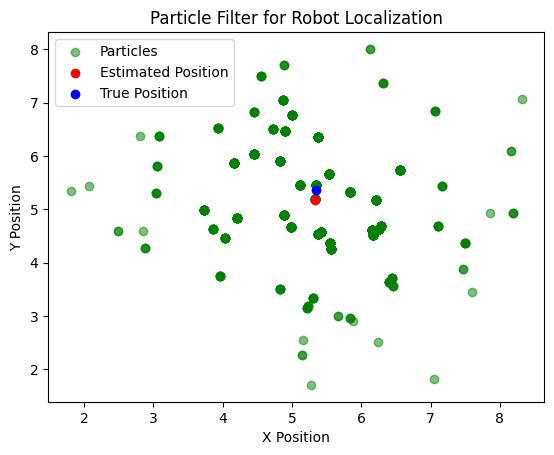

In [15]:
# Jumlah partikel
N = 1000

# Posisi robot yang sebenarnya
true_position = [5, 5]

# Inisialisasi partikel secara acak
particles = np.random.uniform(low=-10, high=10, size=(N, 2))

# Fungsi untuk update posisi berdasarkan kecepatan
def move_robot(position, velocity, angle):
    return position + np.array([velocity * np.cos(angle), velocity * np.sin(angle)])

# Simulasi gerakan robot
velocity = 0.5  # Kecepatan
angle = np.pi / 4  # Sudut
true_position = move_robot(true_position, velocity, angle)

# Sensor Noise
noise = np.random.normal(0, 0.5, size=(N, 2))
measurements = true_position + noise

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal
for i in range(N):
    # Update bobot berdasarkan jarak dari pengukuran
    weights[i] = np.exp(-0.5 * np.linalg.norm(particles[i] - true_position)**2)
weights /= np.sum(weights)

# Resampling
indexes = np.random.choice(range(N), size=N, p=weights)
particles_resampled = particles[indexes]

# Estimasi posisi akhir
estimated_position = np.mean(particles_resampled, axis=0)

# Visualisasi
plt.scatter(particles_resampled[:, 0], particles_resampled[:, 1], color='g', alpha=0.5, label="Particles")
plt.scatter(estimated_position[0], estimated_position[1], color='r', label="Estimated Position")
plt.scatter(true_position[0], true_position[1], color='b', label="True Position")
plt.legend()
plt.title("Particle Filter for Robot Localization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

Hasil Analisis Output:

Berdasarkan visualisasi, dapat dilihat bagaimana partikel sampel tersebar di ruang, namun filter mampu menunjukkan posisi yang akurat dari robot. Posisi yang diestimasi (merah) cukup dekat dengan posisi sebenarnya (biru), menunjukkan bahwa Particle Filter berhasil dalam estimasi posisi robot meskipun ada noise dalam pengukuran.